In [1]:
%matplotlib inline
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


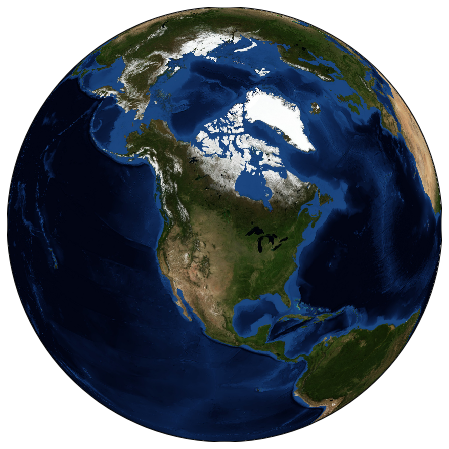

In [2]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)

In [3]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

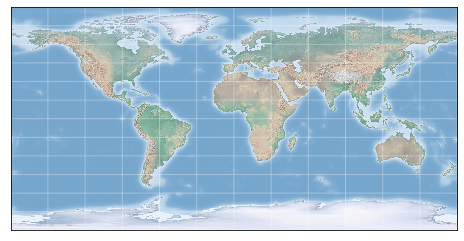

In [4]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

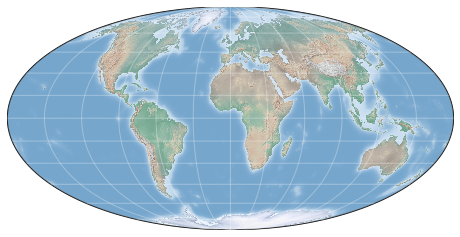

In [5]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

AttributeError: there are no boundary datasets associated with this Basemap instance

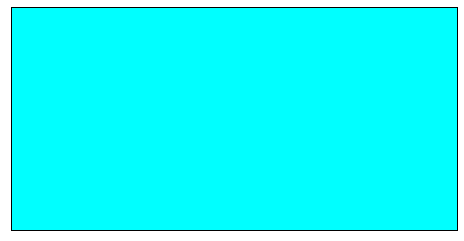

In [6]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua')

m.drawcountries()
draw_map(m)

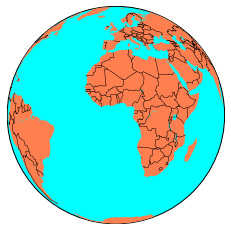

In [7]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')

map.drawcountries()

plt.show()


Adding a background map to plots
--------------------------------

This example shows how you can add a background basemap to plots created
with the geopandas ``.plot()`` method. This makes use of the
`contextily <https://github.com/darribas/contextily>`__ package to retrieve
web map tiles from several sources (OpenStreetMap, Stamen).


In [2]:
# sphinx_gallery_thumbnail_number = 3
import geopandas

Let's use the NYC borough boundary data that is available in geopandas
datasets. Plotting this gives the following result:



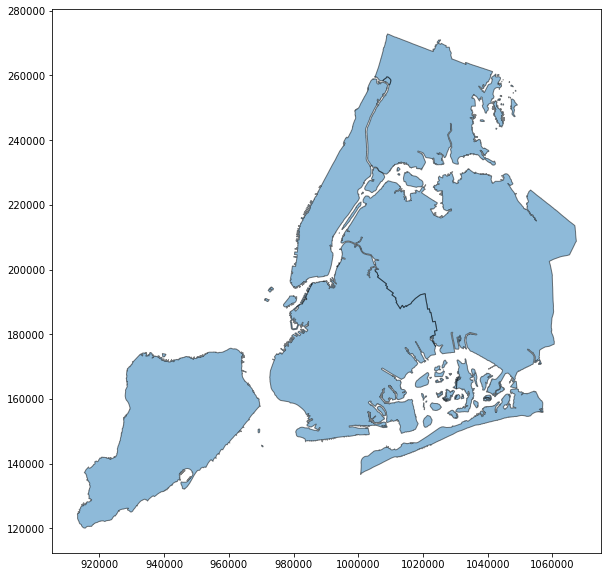

In [3]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

Convert the data to Web Mercator
================================

Web map tiles are typically provided in
`Web Mercator <https://en.wikipedia.org/wiki/Web_Mercator>`__
(`EPSG 3857 <https://epsg.io/3857>`__), so we need to make sure to convert
our data first to the same CRS to combine our polygons and background tiles
in the same map:



In [4]:
df = df.to_crs(epsg=3857)

In [6]:
!pip install contextily

  Using cached https://files.pythonhosted.org/packages/e5/92/fe8838fa8158931906dfc4f16c5c1436b3dd2daf83592645b179581403ad/Cartopy-0.17.0.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  ERROR: Command errored out with exit status 1:
   command: /home/singhj/anaconda3/envs/data-science/bin/python /home/singhj/anaconda3/envs/data-science/lib/python3.7/site-packages/pip/_vendor/pep517/_in_process.py get_requires_for_build_wheel /tmp/tmptj67pjq3
       cwd: /tmp/pip-install-hipvniir/cartopy
  Complete output (3 lines):
  setup.py:171: UserWarning: Unable to determine GEOS version. Ensure you have 3.3.3 or later installed, or installation may fail.
    '.'.join(str(v) for v in GEOS_MIN_VERSION), ))
  Proj 4.9.0 must be installed.
  ----------------------------------------
ERROR: Command errored out with exit status 1: /home/singhj/anaconda3/envs/data-science/bin/python /home/singhj/anaconda3/envs/data-science/lib/python3.7/site-packages/pip/_

In [5]:
import contextily as ctx

ImportError: libkea.so.1.4.7: cannot open shared object file: No such file or directory

Add background tiles to plot
============================

We can use `add_basemap` function of contextily to easily add a background
map to our plot. :



NameError: name 'ctx' is not defined

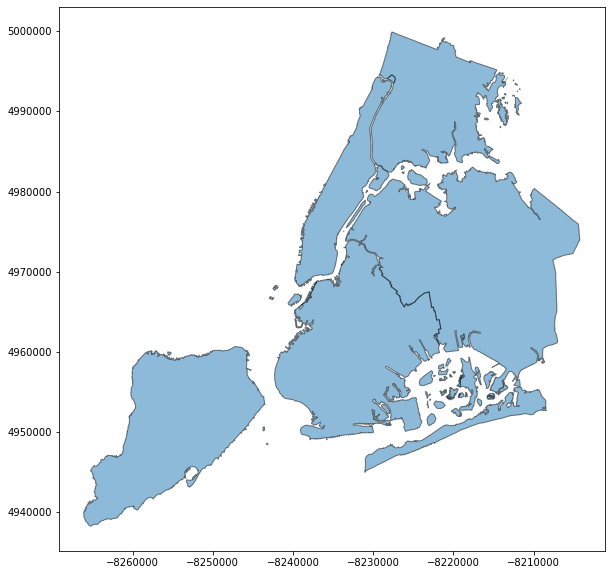

In [6]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

We can control the detail of the map tiles using the optional `zoom` keyword
(be careful to not specify a too high `zoom` level,
as this can result in a large download).:



In [ ]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=12)

By default, contextily uses the Stamen Terrain style. We can specify a
different style using ``ctx.providers``:



In [ ]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()